In [10]:
%matplotlib notebook
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import astrotog
from copy import copy, deepcopy
import opsimsummary as oss
# I personally like this style.
sns.set_style('whitegrid')
# Easy to change context from `talk`, `notebook`, `poster`, `paper`.
sns.set_context('talk')

In [2]:
output_path = '/Users/cnsetzer/Documents/LSST/astrotog_output/rosswog_results/binomial_runs/'
output_dirs = os.listdir(output_path)

In [3]:
results = {}
for directory in output_dirs:
    if directory == '.DS_Store':
        continue
    else:
        name_split = re.split('_',directory)
        model = name_split[1]
        name = name_split[2]
        if re.search('minion',name) is not None:
            name += name_split[3]
        for string in name_split:
            if re.search('var', string) is not None:
                name += string
                
        if re.search('pontus2502',name) is not None and re.search('_2_',directory) is not None:
            name += '_2'
            
        results[name] = {}
        results[name][model] = {}
        results[name][model]['data'] = {}
        results[name][model]['data']['observations'] = pd.read_csv(output_path + directory +'/observations.csv',index_col=0)
        results[name][model]['data']['parameters'] = pd.read_csv(output_path + directory +'/modified_parameters.csv',index_col=0)
        results[name][model]['data']['coadded observations'] = pd.read_csv(output_path + directory +'/coadded_observations.csv',index_col=0)
        results[name][model]['data']['other observations'] = pd.read_csv(output_path + directory +'/other_observations.csv',index_col=0)
        results[name][model]['data']['scolnic detections'] = pd.read_csv(output_path + directory +'/scolnic_detections.csv',index_col=0)
        results[name][model]['number scolnic'] = len(results[name][model]['data']['scolnic detections']['transient_id'].unique())

/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/numpy/lib/arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
fiducial_scolnic = 74.5

In [5]:
sc_raw_cadence_numbers = []
sc_cadence =[]

rw_raw_cadence_numbers = []
rw_cadence =[]
for key in results.keys():
    for key2 in results[key].keys():
        if key2 == 'scolnic' and re.search('var',key) is None:
            sc_cadence.append(key)
            sc_raw_cadence_numbers.append(results[key][key2]['number scolnic'])
        elif key2 == 'rosswog' and re.search('var',key) is None:
            rw_cadence.append(key)
            rw_raw_cadence_numbers.append(results[key][key2]['number scolnic'])
        elif re.search('var', key) is not None:
            var
if len(sc_cadence ) > 0:
    sc_cadence_numbers = deepcopy(sc_raw_cadence_numbers)
    print(list(zip(sc_cadence, sc_raw_cadence_numbers)))
    
if len(rw_cadence) > 0:
    rw_cadence_numbers = deepcopy(rw_raw_cadence_numbers)
    print(list(zip(rw_cadence, rw_raw_cadence_numbers)))

[('kraken2036', 54), ('mothra2045', 34), ('pontus2489', 54), ('pontus2002', 47), ('kraken2035', 43), ('colossus2665', 48), ('kraken2026', 53), ('colossus2664', 45), ('kraken2044', 64), ('nexus2097', 48), ('pontus2502', 31), ('minion1016descdithersv4', 40), ('kraken2042', 48), ('mothra2049', 49), ('colossus2667', 68), ('baseline2018a', 48)]


In [6]:
# sort based on number detected
if len(sc_cadence ) > 0:
    sc_sorted_cadences = [x for _, x in sorted(zip(sc_raw_cadence_numbers,sc_cadence), key=lambda pair: pair[0])]
    sc_raw_cadence_numbers.sort()
    sc_sorted_cadence_numbers = sc_raw_cadence_numbers

if len(rw_cadence ) > 0:
    rw_sorted_cadences = [x for _, x in sorted(zip(rw_raw_cadence_numbers,rw_cadence), key=lambda pair: pair[0])]
    rw_raw_cadence_numbers.sort()
    rw_sorted_cadence_numbers = rw_raw_cadence_numbers

<IPython.core.display.Javascript object>


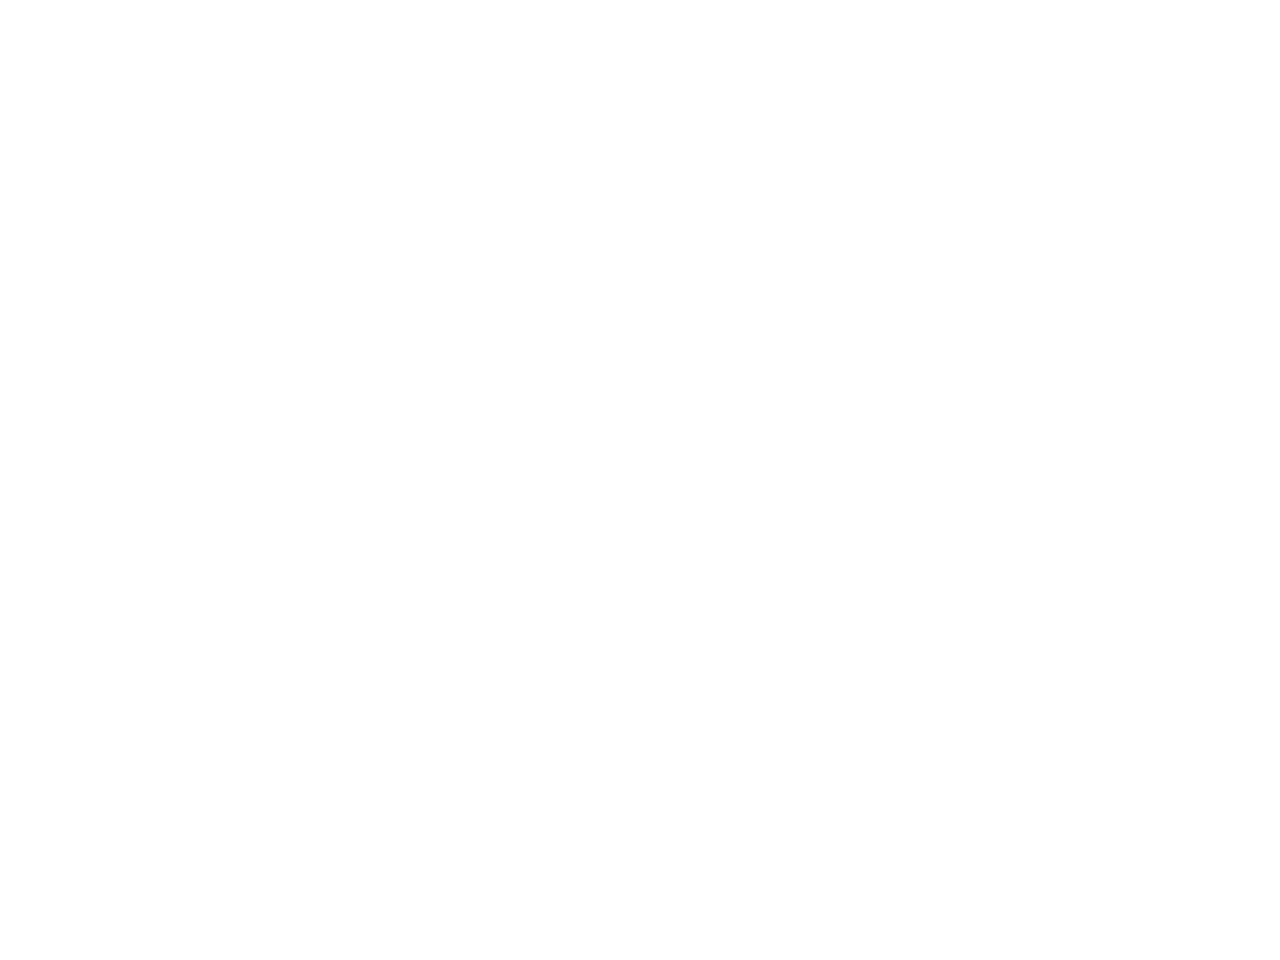

NameError: name 'sc_cadence_numbers' is not defined

In [7]:
fig = plt.figure()
plt.scatter(sc_cadence, sc_cadence_numbers)
plt.ylim([50, 100])
plt.axhline(fiducial_scolnic,color='r')
plt.xticks(rotation='vertical')
plt.title('Number of Detections vs. Cadence (Scolnic et. al 2018)')
plt.ylabel('Number of Detected KNe')
plt.legend(['Value from Scolnic et. al 2017','Number Detected per Cadence'])
plt.show()
plt.savefig('Unsorted_raw_counts.pdf',bbox_inches='tight')

In [ ]:
fig = plt.figure()
plt.scatter(rw_cadence, rw_cadence_numbers)
plt.ylim([0, 80])
plt.axhline(fiducial_scolnic,color='r')
plt.xticks(rotation='vertical')
plt.title('Number of Detections vs. Cadence (Rosswog et. al 2018)')
plt.ylabel('Number of Detected KNe')
plt.legend(['Value from Scolnic et. al 2017','Number Detected per Cadence'])
plt.show()
plt.savefig('Unsorted_raw_counts.pdf',bbox_inches='tight')

In [ ]:
fig = plt.figure()
plt.scatter(sc_sorted_cadences, sc_sorted_cadence_numbers)
plt.ylim([50, 100])
plt.axhline(fiducial_scolnic,color='r')
plt.xticks(rotation='vertical')
plt.title('Detections vs. Cadence (Scolnic et. al 2017)')
plt.ylabel('Number of KNe')
plt.legend(['Value from Scolnic et. al 2017','Number Detected per Cadence'])
plt.show()
plt.savefig('sorted_scolnic_counts_by_cadence.pdf',bbox_inches='tight')

In [ ]:
fig = plt.figure()
plt.scatter(rw_sorted_cadences, rw_sorted_cadence_numbers)
plt.ylim([0, 80])
plt.axhline(fiducial_scolnic,color='r')
plt.xticks(rotation='vertical')
plt.title('Detections vs. Cadence (Rosswog et. al 2018)')
plt.ylabel('Number of KNe')
plt.legend(['Value from Scolnic et. al 2017','Number Detected per Cadence'], loc=4)
plt.show()
plt.savefig('Sorted_rosswog_counts.pdf',bbox_inches='tight')

In [ ]:
def redshift_distribution(param_df):
    z_min = 0.0
    z_max = 0.5
    bin_size = 0.025
    n_bins = int(round((z_max-z_min)/bin_size))
    all_zs = list(param_df['true_redshift'])
    is_detected = not param_df[param_df['detected']].empty
    if is_detected is False:
        detect_zs = []
        max_depth_detect = []
    else:
        detect_zs = list(param_df[param_df['detected']]['true_redshift'])
        max_depth_detect = list(param_df[param_df['true_redshift'] <= max(detect_zs)]['true_redshift'])

    total_eff = (len(detect_zs)/len(all_zs))*100
    max_depth_eff = (len(detect_zs)/len(max_depth_detect))*100

    print('The redshift range of all sources is {0:.4f} to {1:.4f}.'.format(min(all_zs), max(all_zs)))
    print('The redshift range of the detected sources is {0:.4f} to {1:.4f}.'.format(min(detect_zs), max(detect_zs)))
    print('There are {0} detected transients out of {1}, which is an efficiency of {2:2.2f}%  of the total simulated number.'.format(len(detect_zs), len(all_zs), total_eff))
    print('However, this is an efficiency of {0:2.2f}%  of the total that occur within the range that was detected by {1}.'.format(max_depth_eff, 'lsst'))
    # Create the histogram
    N_z_dist_fig = plt.figure()
    plt.hist(x=all_zs, bins=n_bins, range=(z_min, z_max), histtype='step', color='red', label='All Sources', linewidth=3.0)
    plt.hist(x=detect_zs, bins=n_bins, range=(z_min, z_max), histtype='stepfilled', edgecolor='blue', color='blue', alpha=0.3, label='Detected Sources', )
    # plt.tick_params(which='both', length=10, width=1.5)
    plt.yscale('log')
    plt.legend(loc=2)
    plt.xlabel('z')
    plt.ylabel(r'$N(z)$')
    plt.title('Redshift Distribution ({0:.3f} bins).'.format(bin_size, max_depth_eff))
    return N_z_dist_fig


In [ ]:
print(results.keys())

In [ ]:
nz_fig_worst = redshift_distribution(results['pontus2502']['scolnic']['data']['parameters'])
nz_fig_best1 = redshift_distribution(results['colossus2667']['scolnic']['data']['parameters'])
nz_fig_best2 = redshift_distribution(results['kraken2044']['scolnic']['data']['parameters'])
nz_fig_baseline = redshift_distribution(results['kraken2026']['scolnic']['data']['parameters'])

nz_fig_worst.savefig('scolnic_redshift_distribution_worst.pdf', bbox_inches='tight')
plt.close(nz_fig_worst)
nz_fig_baseline.savefig('scolnic_redshift_distribution_baseline.pdf', bbox_inches='tight')
plt.close(nz_fig_baseline)
nz_fig_best1.savefig('scolnic_redshift_distribution_best1.pdf', bbox_inches='tight')
plt.close(nz_fig_best1)
plt.close(nz_fig_baseline)
nz_fig_best2.savefig('scolnic_redshift_distribution_best2.pdf', bbox_inches='tight')
plt.close(nz_fig_best2)


## Plot lightcurves

In [ ]:
detect_df_best = results['colossus2667']['rosswog']['data']['scolnic detections']

In [ ]:
detect_df_best['transient_id'].unique()

In [ ]:
lc_df = detect_df_best.query('transient_id == 55470')
print(lc_df)

In [ ]:
lc_df.query('bandfilter == \'z\'')

In [ ]:
band_plots = []
fig = plt.figure()
for band in list(lc_df['bandfilter'].unique()):
    band_plots.append(lc_df.query('bandfilter == \'{}\''.format(band)))

    print(band)

colorlist= ['m','r','y','k','g','b']
    
for i in range(len(band_plots)):
    plt.errorbar(x=band_plots[i]['mjd'], y=band_plots[i]['instrument_magnitude'],yerr=3*band_plots[i]['instrument_mag_one_sigma'],fmt='x',color=colorlist[i])
    
plt.ylim(22.5, 19.5)
plt.xlim(62600, 62610)
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.title('Example Lightcurve of Detection')
plt.legend(['i','r','y','z','g','u'], loc=1)

fig.savefig('example_detected_lightcurve.pdf', bbox_inches='tight')

## Parameter Plots

In [8]:
parameter_df=results['colossus2667']['rosswog']['data']['parameters']
parameter_df.columns

Index(['transient_id', 'true_redshift', 'obs_redshift', 'explosion_time',
       'max_time', 'ra', 'dec', 'peculiar_velocity', 'm_ej', 'v_ej', 'kappa',
       'observed', 'alerted', 'detected'],
      dtype='object')

<IPython.core.display.Javascript object>


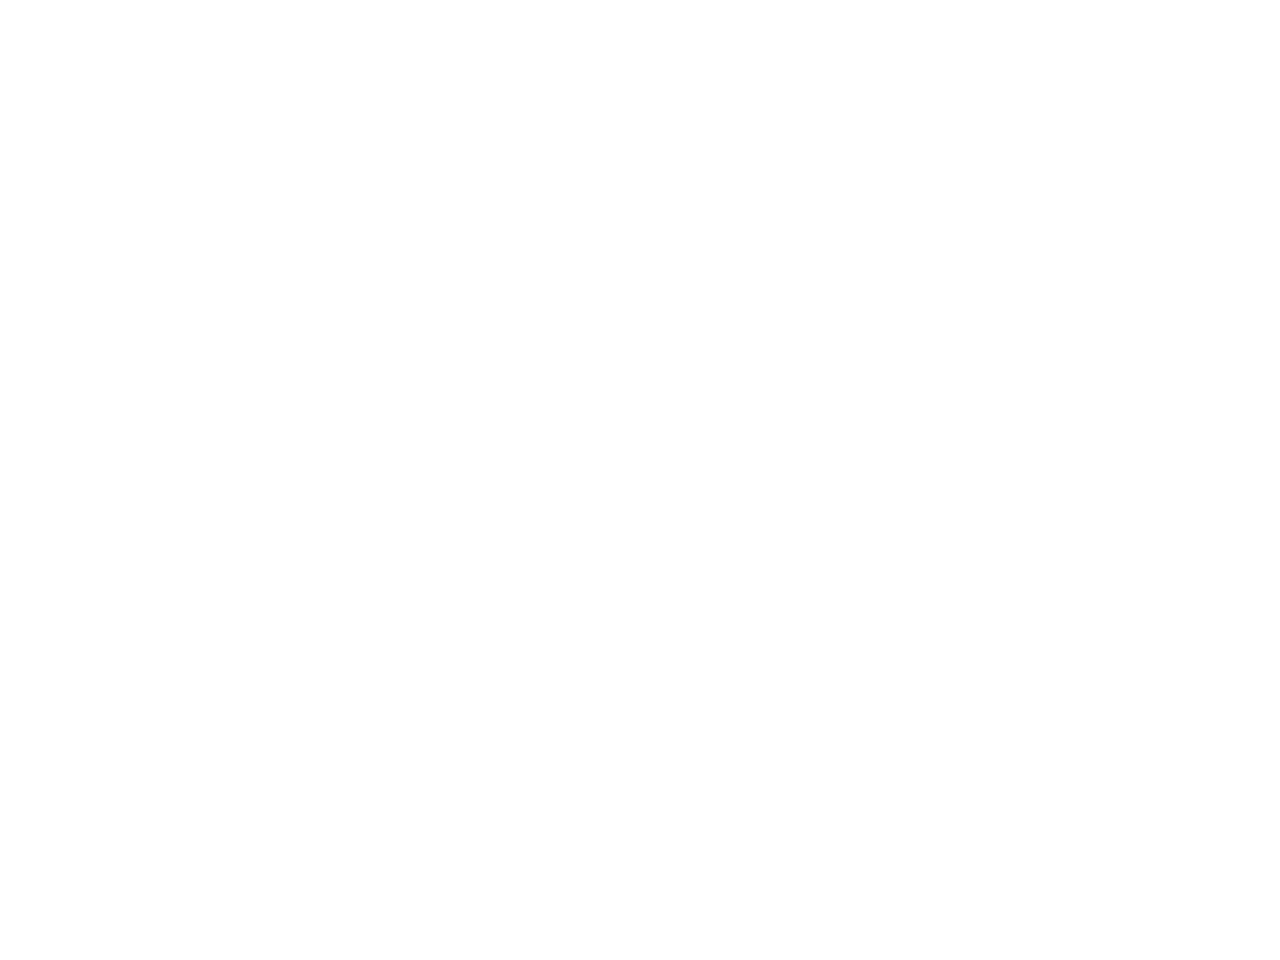

<IPython.core.display.Javascript object>


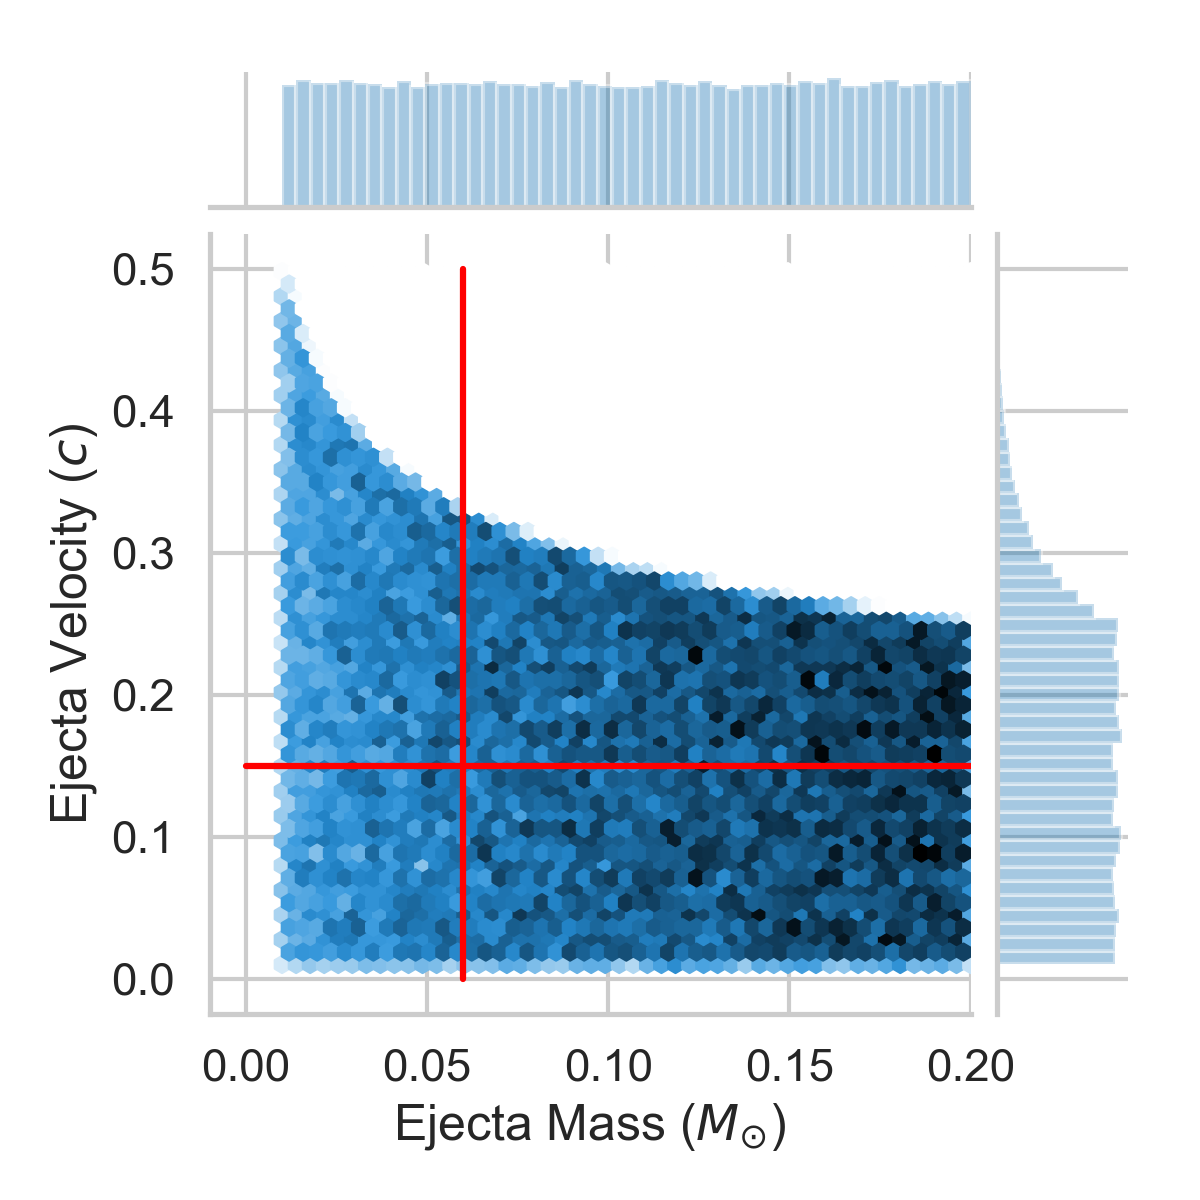

/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [14]:
param_fig = plt.figure()
g = (sns.jointplot('m_ej','v_ej',data = parameter_df, kind='hex').set_axis_labels(r'Ejecta Mass ($M_{\odot}$)',r'Ejecta Velocity ($c$)'))
g.ax_joint.plot([0.06, 0.06], [0.0, 0.5], color='r')
g.ax_joint.plot([0.0, 0.2], [0.15, 0.15], color='r')
g.savefig('../results_plots/rosswog_parameter_dist.pdf',bbox_inches='tight')

In [ ]:
cadence_tabulated = pd.read_csv('cadence_information.csv', sep=';',index_col=0)

In [ ]:
print(cadence_tabulated.columns)

#### Match cadence details with data

In [ ]:
filter_change = []
for cad in sc_sorted_cadences:
    filter_change.append(cadence_tabulated.at[cad,'total_filter_changes'])

In [ ]:
num_filter_fig = plt.figure()

plt.scatter(filter_change,sc_sorted_cadence_numbers)

In [ ]:
from astrotog import top_level_classes as atopclass

In [ ]:
check_transient4= atopclass.scolnic_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/scolnic/DECAMGemini_SED.txt')


In [ ]:
lam = np.arange(1000,25000,10)
times = np.arange(0,20,0.5)

for i in range(len(times)):
    fig = plt.figure()
    sed_step = check_transient4.model.flux(times[i],list(lam))
    plt.plot(lam, sed_step)
    plt.xlabel('lambda')
    plt.ylabel(r'ergs/s/cm^2')
    fig.savefig('sedpng_{0}.png'.format(str(i).zfill(3)), bbox_inches='tight')
    plt.close(fig)

In [ ]:
re.split("(\d+)",'pontus2502')